# Getting started

## Setting up

### 1. Install uv

Install the [uv python project manager](https://docs.astral.sh/uv), following the instructions on uv's [official installation guide](https://docs.astral.sh/uv/getting-started/installation).

### 2. Clone the pymdea repository

Using a command line terminal, clone the pymdea repository to a location on your file system:
```
git clone https://github.com/garland-culbreth/pymdea.git /example/file/path/pymdea.git
```

### 3. Create virtual environment

Navigate to the cloned repository directory:
```
cd /example/file/path/pymdea.git
```
and run the uv command:
```
uv sync
```
This will create a python virtual environment in a subdirectory called `.../pymdea.git/.venv` which contains a python executable and all packages necessary to run pymdea. The command will display text output in the command line, which should look like this:
```
❯ uv sync
Using Python 3.12.5
Creating virtualenv at: .venv
Resolved 107 packages in 1.01s
   Built pymdea @ file:///D:/repos/pymdea.git
Prepared 101 packages in 819ms
░░░░░░░░░░░░░░░░░░░░ [0/101] Installing
Installed 101 packages in 5.05s
 + asttokens==2.4.1
 + attrs==24.2.0
 + babel==2.16.0
 ... (all 101 packages uv installs will be listed out)
```
Note: the file path, `D:/repos/pymdea.git`, is the directory on my own file system my clone of pymdea is located.

### 4. Verify everything is working

To confirm the files work properly, run the uv command:
```
uv run pytest
```
This runs the pymdea test suite from `test_core.py` and display a summary of the results in the command line output.

With these steps complete, you're now ready to import the pymdea.core and pymdea.plot modules and work with them!

## Loading pymdea

Import the pymdea modules as you would any other Python package.

In [1]:
from pymdea.core import DeaEngine, DeaLoader
from pymdea.plot import DeaPlotter


## Loading data

The `pymdea.core` module provides a `DeaLoader` class with helper methods for wrangling data. It also has a `make_sample_data` method for generating sample data for testing purposes, which is what this notebook will use to illustrate an example workflow.

In [2]:
dea_loader = DeaLoader()
dea_loader.make_sample_data(30000)

## Analyzing data

The `DeaEngine` class from `pymdea.core` contains the methods for analyzing data once it's been loaded. Pass `DeaLoader` to `DeaEngine` to pass the data from the loader to the engine, then invoke the `analyze` method to run an analysis.

In [3]:
dea_engine = DeaEngine(dea_loader)
dea_engine.analyze_with_stripes(fit_start=10, fit_stop=2000, n_stripes=60)

100%|██████████| 7499/7499 [00:04<00:00, 1559.24it/s]


--------------------------------- 
result 
 δ: 0.4925651460907282 
 μ (rule 1): 1.4925651460907283 
 μ (rule 2): 3.030188306940834 
---------------------------------


## Viewing results

The `DeaPlotter` class from `pymdea.plot` contains methods for viewing the results and producing plots. Pass `DeaEngine` to `DeaPlotter` to pass the results from the engine to the plotter, then invoke the plotting methods to view different summaries of the results.

In [4]:
dea_plot = DeaPlotter(dea_engine)

The most illustrative figure is plotting the Shannon entropy against the log of the window lengths, S(L) vs ln(L):

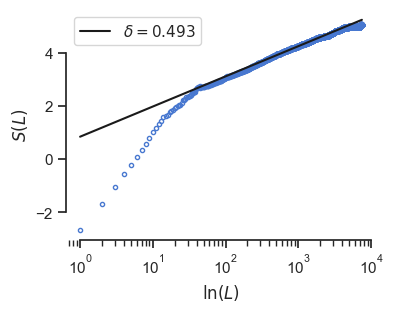

In [5]:
dea_plot.s_vs_l()

It's also useful to quickly compare the results of the different rules for computing the `mu` parameter:

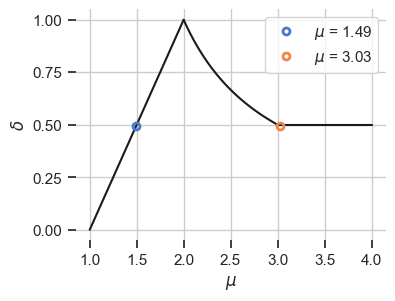

In [6]:
dea_plot.mu_candidates()